<a href="https://colab.research.google.com/github/RKrosnicki/Projekt_koncowy_SDA/blob/main/Projekt_koncowy_25_03_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir /.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/road-sign-detection

 92% 201M/218M [00:01<00:00, 143MB/s]
100% 218M/218M [00:01<00:00, 131MB/s]


In [ ]:
! unzip '/content/road-sign-detection.zip'

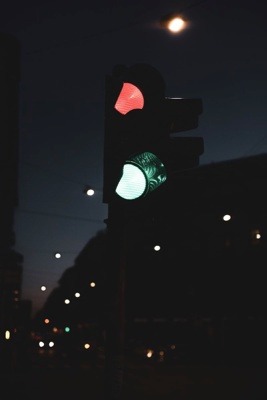

In [ ]:
cv2_imshow(cv2.imread("/content/images/road0.png"))

In [ ]:
import xml.etree.ElementTree as ET
tree = ET.parse('/content/annotations/road0.xml')
root = tree.getroot()

In [ ]:
root.tag

'annotation'

In [ ]:
root.attrib

{}

In [ ]:
for child in root:
    print(child.tag, child.attrib)

folder {}
filename {}
size {}
segmented {}
object {}


In [ ]:
root[4][0].text

'trafficlight'

In [ ]:
root[2][0].text

'267'

In [ ]:
root[2][1].text

'400'

In [ ]:
root[2][2].text

'3'

In [ ]:
root[1].text

'road0.png'

In [ ]:
import glob
images_names = glob.glob('/content/images/*.png')
#images_names

In [ ]:
for i in range(len(images_names)) :
    images_names[i] = images_names[i].lstrip("/content/images/")
    #print(images_names[i])

In [ ]:
import xml.etree.ElementTree as ET
tree = ET.parse('/content/annotations/road0.xml')
root = tree.getroot()
root[4][0].text

'trafficlight'

In [ ]:
# xmin, ymin, xmax, ymax = root[4][5][0].text, root[4][5][1].text, root[4][5][2].text, root[4][5][3].text

In [ ]:
annotations_number = len(glob.glob('/content/annotations/*.xml'))

In [ ]:
annotations_names = glob.glob('/content/annotations/*.xml')

In [ ]:
annotations_names.sort()

In [ ]:
for i in range(annotations_number) :
    annotations_names[i] = annotations_names[i].lstrip("/content/annotations/")

In [ ]:
#annotations_names

In [ ]:
df = pd.DataFrame()
df['filename'] = sorted(glob.glob('/content/images/*.png'))

temp_list = []
for i in annotations_names :
    tree = ET.parse("/content/annotations/"+i)
    root = tree.getroot()
    temp_list.append(root[4][0].text)

df['class'] = temp_list

In [ ]:
df.sample()

,filename,class
141,/content/images/road225.png,speedlimit


In [ ]:
annotations_number

877

In [ ]:
import matplotlib.pyplot as plt

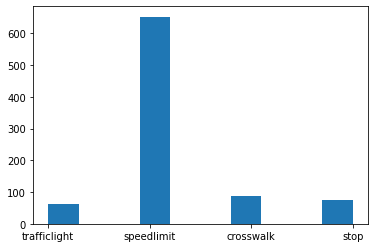

In [ ]:
plt.figure() #figsize=(12,9))
plt.hist(df2['class'])
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
df

,filename,class
0,/content/images/road0.png,trafficlight
1,/content/images/road1.png,trafficlight
2,/content/images/road10.png,trafficlight
3,/content/images/road100.png,speedlimit
4,/content/images/road101.png,speedlimit
...,...,...
872,/content/images/road95.png,stop
873,/content/images/road96.png,stop
874,/content/images/road97.png,stop
875,/content/images/road98.png,stop


In [ ]:
df['class'].value_counts()

speedlimit      652
crosswalk        88
stop             76
trafficlight     61
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test, y_train, y_test = train_test_split(df, df['class'], test_size= 0.2, random_state=1234, stratify=df['class'])

In [ ]:
df_test

,filename,class
584,/content/images/road624.png,speedlimit
756,/content/images/road78.png,stop
375,/content/images/road436.png,speedlimit
504,/content/images/road552.png,speedlimit
561,/content/images/road603.png,speedlimit
...,...,...
102,/content/images/road190.png,crosswalk
602,/content/images/road640.png,speedlimit
739,/content/images/road764.png,speedlimit
162,/content/images/road244.png,speedlimit


In [ ]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [ ]:
train_generator = datagen.flow_from_dataframe(
dataframe=df_train,
x_col="filename",
y_col="class",
subset="training",
batch_size=32,
seed=13,
shuffle=True,
class_mode="categorical",
target_size=(64,64))

Found 526 validated image filenames belonging to 4 classes.


In [ ]:
valid_generator = datagen.flow_from_dataframe(
dataframe=df_train,
x_col="filename",
y_col="class",
subset="validation",
batch_size=32,
seed=13,
shuffle=True,
class_mode="categorical",
target_size=(64,64))

Found 175 validated image filenames belonging to 4 classes.


In [ ]:
datagen_test = ImageDataGenerator(rescale=1./255.)

In [ ]:
test_generator=datagen_test.flow_from_dataframe(
dataframe=df_test,
x_col="filename",
y_col=None,
batch_size=32,
seed=13,
shuffle=False,
class_mode=None,
target_size=(64,64))

Found 176 validated image filenames.


In [ ]:
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

In [ ]:
model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=[64,64,3], activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        8256      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"], optimizer='adam')

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3, restore_best_weights=True)

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=32,
                    callbacks=[es]
                    )

<ipython-input-59-f1341a8359f0>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/32
16/16 [==============================] - 26s 2s/step - loss: 9.0644 - accuracy: 0.5911 - val_loss: 0.9364 - val_accuracy: 0.7375
Epoch 2/32
16/16 [==============================] - 16s 960ms/step - loss: 5.5284 - accuracy: 0.6680 - val_loss: 1.4976 - val_accuracy: 0.7125
Epoch 3/32
16/16 [==============================] - 12s 753ms/step - loss: 4.0552 - accuracy: 0.6640 - val_loss: 2.2634 - val_accuracy: 0.7125
Epoch 4/32
16/16 [==============================] - 13s 792ms/step - loss: 3.2931 - accuracy: 0.6802 - val_loss: 4.1200 - val_accuracy: 0.7312
Epoch 5/32
16/16 [==============================] - 12s 768ms/step - loss: 2.9707 - accuracy: 0.6984 - val_loss: 6.6798 - val_accuracy: 0.7250
Epoch 6/32
16/16 [==============================] - 12s 762ms/step - loss: 1.6758 - accuracy: 0.7571 - val_loss: 7.3416 - val_accuracy: 0.7312
Epoch 7/32
16/16 [==============================] - 13s 784ms/step - loss: 1.3031 - accuracy: 0.7753 - val_loss: 9.1984 - val_accuracy: 0.7312
Ep

In [ ]:
df_test.shape[0]

176

In [ ]:
eval = model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_TEST)
eval

<ipython-input-61-5545331fb44c>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval = model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_TEST)


In [ ]:
print(f"Your accuracy: {round(eval[1]*100,2)}%")

In [ ]:
test_generator.reset()
pred=model.predict_generator(test_generator, steps=df_test.shape[0], verbose=1)

In [ ]:
pred.shape

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
predicted_class_indices

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
len(test_generator.filenames)

In [ ]:
filenames=test_generator.filenames
results=pd.DataFrame({"filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

In [ ]:
final_csv = pd.read_csv('/content/results.csv')

In [ ]:
final_csv

In [ ]:
df_test.head()

In [ ]:
merged_tables = pd.merge(final_csv, df_test, on='filename', how='left')
merged_tables

In [ ]:
merged_tables['comparison'] = merged_tables['Predictions']==merged_tables['class']

In [ ]:
merged_tables

In [ ]:
plt.figure()
merged_tables['comparison'].value_counts().plot(kind='bar', title='Comparison')
plt.show()

In [ ]:
merged_tables.to_csv("results_compared.csv",index=False)